In [4]:
import pandas as pd
import re
from emoji import emoji_count
import seaborn as sns
import matplotlib.pyplot as plt
import math
import numpy as np
from scipy.stats import mannwhitneyu,kruskal
from scikit_posthocs import posthoc_dunn

In [5]:
def load_data():    
    data = pd.read_excel('../cleaned_users.xlsx')
    username_list = data['username']

    num_mentions = []
    num_url = []
    num_hashtags = []
    num_emojis = []

    for username in username_list:
        with open(f'../Documents/{username}.txt','r') as f:
            text = f.read()
            num_mentions.append(text.count('@'))
            num_url.append(text.count('http://') + text.count('https://'))
            num_hashtags.append(text.count('#'))
            num_emojis.append(emoji_count(text))

    data['mentions'] = num_mentions
    data['url'] = num_url
    data['hashtags'] = num_hashtags
    data['emojis'] = num_emojis

    return data

In [6]:
data = load_data()
data.head()

,username,gender,age,region,mentions,url,hashtags,emojis
0,lozanogarcia68,female,55+,Madrid,40,30,0,42
1,beltrangmodet,male,18-24,Madrid,24,0,1,0
2,edubellver,male,18-24,Madrid,22,0,0,0
3,luss_27,female,18-24,Madrid,29,35,0,43
4,k15ce,male,25-34,Madrid,85,15,19,16


In [7]:
data['region'].unique()

array(['Madrid', 'Andalucia', 'Canarias', 'Extremadura',
       'Castilla y Leon', 'Valencia', 'Galicia', 'Catalunya', 'La Rioja',
       'Pais Vasco', 'Castilla-La Mancha', 'Asturias', 'Aragon',
       'Cantabria', 'Murcia', 'Navarra'], dtype=object)

## TWITTER FEATURES ANALYSIS: 

1. Number of mentions
2. Number of hashtags
3. Number of URL
4. Number of emojis

#### Steps:

- Create boxplots to visualize independence between studied features and the users personal traits (gender, age and demography)
- Statistical measures: d of Cohen for traits with only 2 options, f of Cohen for traits with more than 2 possibilities.
The d of Cohen can be either positive or negative. Two variables are considered independant when the absolute value of d is 0 or very close to 0, and as the absolute value of d gets bigger, the relationship between the variables becomes stronger. Normally, when the value is below 0.2 the dependency between the variables is considered small, when it is around 0.5 it's considered moderate, and the dependency is big when the value is greater than 0.8

In [8]:
def remove_outliers(data,column,value=None):
    outliers_index = np.where(data[column] > value)
    data.drop(outliers_index[0], inplace=True)
    data.reset_index(drop=True,inplace=True)

    return data

def box_plot(column,data):
    fig,ax = plt.subplots(1,3,figsize=(15,7))

    sns.boxplot(x='gender',y=column,data=data,ax=ax[0])
    sns.boxplot(x='age',y=column,data=data,ax=ax[1],order=['18-24','25-34','35-44','45-54','55+'])
    sns.boxplot(x='region',y=column,data=data,ax=ax[2])
    plt.xticks(rotation=65)

def d_cohen(mean1, mean2, std):
    return (mean1 - mean2)/std

def f_cohen(mean_list,count_list,total_mean):

    suma = 0
    for mean, count in zip(mean_list,count_list):
        suma += count * math.pow((mean - total_mean),2)

    return math.sqrt(suma/len(data))

def mann_whitney(df,column):
    # Mann-Whitney U test
    fem_df = df.loc[df['gender'] == 'female'][column].tolist()
    male_df = df.loc[df['gender'] == 'male'][column].tolist()

    res = mannwhitneyu(fem_df,male_df)
    return res

def kruskal_posthoc(df,column):
    # Kruskal-Wallis test
    df_aux = df.copy()
    df_aux = df_aux.groupby('age')[column]
    data = [df_aux.get_group(x).tolist() for x in df_aux.groups]

    data1 = df_aux.get_group('18-24').tolist()
    data2 = df_aux.get_group('25-34').tolist()
    data3 = df_aux.get_group('35-44').tolist()
    data4 = df_aux.get_group('45-54').tolist()
    data5 = df_aux.get_group('55+').tolist()

    res = kruskal(data1,data2,data3,data4,data5)
    print(f'AGE: {res}')

    posthoc = posthoc_dunn(data,p_adjust='holm')
    posthoc.set_axis(['18-24','25-34','35-44','45-54','55+'],axis=0,inplace=True)
    posthoc.set_axis(['18-24','25-34','35-44','45-54','55+'],axis=1,inplace=True)
    print(f'AGE: {posthoc}')

    # REGION
    df_aux = df.copy()
    df_aux = df_aux.groupby('region')[column]
    data = [df_aux.get_group(x).tolist() for x in df_aux.groups]

    data1 = df_aux.get_group('Madrid').tolist()
    data2 = df_aux.get_group('Andalucia').tolist()
    data3 = df_aux.get_group('Extremadura').tolist()
    data4 = df_aux.get_group('Canarias').tolist()
    data5 = df_aux.get_group('Castilla y Leon').tolist()
    data6 = df_aux.get_group('Valencia').tolist()
    data7 = df_aux.get_group('Galicia').tolist()
    data8 = df_aux.get_group('Catalunya').tolist()
    data9 = df_aux.get_group('La Rioja').tolist()
    data10 = df_aux.get_group('Pais Vasco').tolist()
    data11 = df_aux.get_group('Castilla-La Mancha').tolist()
    data12 = df_aux.get_group('Asturias').tolist()
    data13 = df_aux.get_group('Aragon').tolist()
    data14 = df_aux.get_group('Cantabria').tolist()
    data15 = df_aux.get_group('Murcia').tolist()
    data16 = df_aux.get_group('Navarra').tolist()

    res = kruskal(data1,data2,data3,data4,data5,data6,data7,data8,data9,data10,data11,data12,data13,data14,data15,data16)
    print(f'REGION: {res}')

    posthoc = posthoc_dunn(data,p_adjust='holm')
    posthoc.set_axis(['Madrid','Andalucia','Extremadura','Canarias','Castilla y Leon','Valencia','Galicia','Catalunya','La Rioja','Pais Vasco','Castilla-La Mancha','Asturias','Aragon','Cantabria','Murcia','Navarra'],axis=0,inplace=True)
    posthoc.set_axis(['Madrid','Andalucia','Extremadura','Canarias','Castilla y Leon','Valencia','Galicia','Catalunya','La Rioja','Pais Vasco','Castilla-La Mancha','Asturias','Aragon','Cantabria','Murcia','Navarra'],axis=1,inplace=True)
    print(f'REGION: {posthoc}')

def statistics(column,data):
    # d of Cohen
    mean_col = data[column].mean()
    std_col = data[column].std()
    # gender
    mean_gender = data.groupby(['gender'])[column].mean()

    d_gender = d_cohen(mean_gender['female'],mean_gender['male'],std_col)
    print(f'The d of Cohen for gender is: {d_gender}')

    # f of Cohen
    # age
    mean_age = data.groupby(['age'])[column].mean()
    count_age = data.groupby(['age'])[column].count()
    f_cohen_age = f_cohen(mean_age,count_age,mean_col)
    f_cohen_age_normalized = f_cohen_age/(max(mean_age) - min(mean_age))
    print(f'The f of Cohen for age is: {f_cohen_age}')
    print(f'The f of Cohen normalized for age is: {f_cohen_age_normalized}')

    # demography
    mean_dem = data.groupby(['region'])[column].mean()
    count_dem = data.groupby(['region'])[column].count()
    f_cohen_dem = f_cohen(mean_dem,count_dem,mean_col)
    f_cohen_dem_normalized = f_cohen_dem/(max(mean_dem) - min(mean_dem))
    print(f'The f of Cohen for demography is: {f_cohen_dem}')
    print(f'The f of Cohen normalized for demography is: {f_cohen_dem_normalized}')

### 1. Number of mentions 

In [9]:
# Mann-Whitney U test
df = data.copy()
res = mann_whitney(df,'mentions')
print(res)

MannwhitneyuResult(statistic=160836.5, pvalue=0.610775700995458)


In [10]:
# Kruskal-Wallis test
kruskal_posthoc(df,'mentions')


AGE: KruskalResult(statistic=155.151882156111, pvalue=1.6013506944892138e-32)
AGE:               18-24         25-34         35-44         45-54           55+
18-24  1.000000e+00  4.007751e-01  4.345506e-15  2.058961e-20  1.834449e-16
25-34  4.007751e-01  1.000000e+00  9.371936e-11  2.522874e-15  5.877661e-12
35-44  4.345506e-15  9.371936e-11  1.000000e+00  6.422411e-01  7.738712e-01
45-54  2.058961e-20  2.522874e-15  6.422411e-01  1.000000e+00  7.738712e-01
55+    1.834449e-16  5.877661e-12  7.738712e-01  7.738712e-01  1.000000e+00
REGION: KruskalResult(statistic=36.98263220232111, pvalue=0.0012729251033342746)
REGION:                     Madrid  Andalucia  Extremadura  Canarias  Castilla y Leon  \
Madrid                 1.0   1.000000          1.0       1.0         1.000000   
Andalucia              1.0   1.000000          1.0       1.0         1.000000   
Extremadura            1.0   1.000000          1.0       1.0         1.000000   
Canarias               1.0   1.000000          1

/var/folders/_x/cddkf2k97y19q18kzrrrxrzw0000gn/T/ipykernel_60775/2118193651.py:51: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  posthoc.set_axis(['18-24','25-34','35-44','45-54','55+'],axis=0,inplace=True)
/var/folders/_x/cddkf2k97y19q18kzrrrxrzw0000gn/T/ipykernel_60775/2118193651.py:52: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  posthoc.set_axis(['18-24','25-34','35-44','45-54','55+'],axis=1,inplace=True)
/var/folders/_x/cddkf2k97y19q18kzrrrxrzw0000gn/T/ipykernel_60775/2118193651.py:81: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  posthoc.set_axis(['Madrid','Andalucia','Extremadura','Canarias','Castilla y Leon','Valencia','Galicia','Catalunya','La

The d of Cohen for gender is: -0.017771392814766283
The f of Cohen for age is: 17.271497678232947
The f of Cohen normalized for age is: 0.395857646589917
The f of Cohen for demography is: 9.955707784095953
The f of Cohen normalized for demography is: 0.3084384511423876


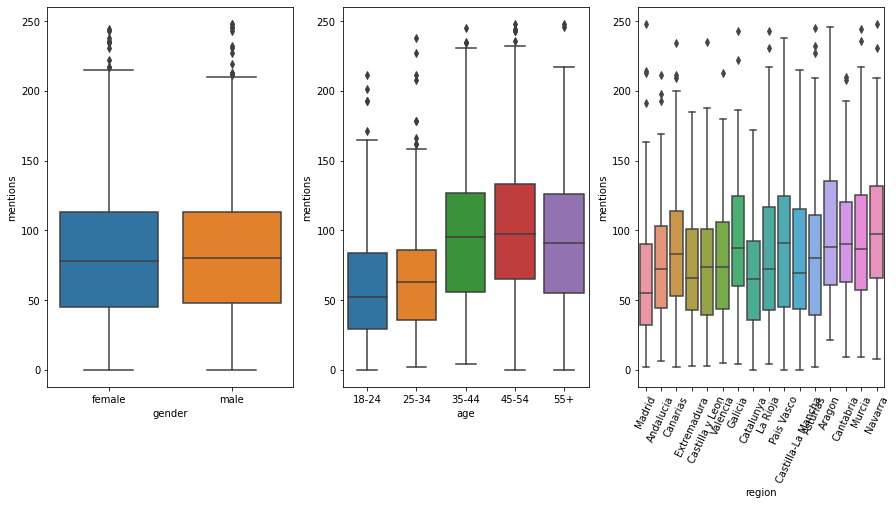

In [7]:
# remove outliers
data = remove_outliers(data,column='mentions',value=250)
# boxplot
box_plot('mentions',data)
# statistics
statistics('mentions',data)

#### Conclusions
- The variables *gender* and *num of mentions* are ***INDEPENDENT***: the statistical measure, d of Cohen, is very close to 0 and we can observe in the plot that the boxes are practically identical
- The variables *age* and *num of mentions* have ***MODERATE DEPENDANCY***: the f of Cohen normalized is close to 0.5, and we can see how the eldest users (>35 years) use more mentions than the youngest users. 
- The variables *demography* and *num of mentions* have ***MODERATE DEPENDANCY***: the f of Cohen is above 0.3 but smaller than the latter.  We can see that regions, such as *Aragon* have a slightly bigger box than the rest, meaning they use more mentions. 

### 2. Number of hashtags

In [11]:
# Mann-Whitney U test
df = data.copy()
res = mann_whitney(df,'hashtags')
print(res)

MannwhitneyuResult(statistic=179799.5, pvalue=0.003555651256860382)


In [13]:
# Kruskal-Wallis test
kruskal_posthoc(df,'hashtags')

AGE: KruskalResult(statistic=241.67904960808602, pvalue=4.03505425233954e-51)
AGE:               18-24         25-34         35-44         45-54           55+
18-24  1.000000e+00  9.705677e-06  8.821297e-27  6.194458e-42  9.219155e-25
25-34  9.705677e-06  1.000000e+00  7.740529e-10  1.539994e-19  1.451379e-08
35-44  8.821297e-27  7.740529e-10  1.000000e+00  1.646621e-02  5.860950e-01
45-54  6.194458e-42  1.539994e-19  1.646621e-02  1.000000e+00  3.754455e-03
55+    9.219155e-25  1.451379e-08  5.860950e-01  3.754455e-03  1.000000e+00
REGION: KruskalResult(statistic=86.68083973592314, pvalue=4.109422969800937e-12)
REGION:                       Madrid  Andalucia  Extremadura  Canarias  \
Madrid              1.000000   0.000023     1.000000  0.070891   
Andalucia           0.000023   1.000000     0.000098  1.000000   
Extremadura         1.000000   0.000098     1.000000  0.169709   
Canarias            0.070891   1.000000     0.169709  1.000000   
Castilla y Leon     0.000011   1.000000   

/var/folders/_x/cddkf2k97y19q18kzrrrxrzw0000gn/T/ipykernel_60775/2118193651.py:51: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  posthoc.set_axis(['18-24','25-34','35-44','45-54','55+'],axis=0,inplace=True)
/var/folders/_x/cddkf2k97y19q18kzrrrxrzw0000gn/T/ipykernel_60775/2118193651.py:52: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  posthoc.set_axis(['18-24','25-34','35-44','45-54','55+'],axis=1,inplace=True)
/var/folders/_x/cddkf2k97y19q18kzrrrxrzw0000gn/T/ipykernel_60775/2118193651.py:81: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  posthoc.set_axis(['Madrid','Andalucia','Extremadura','Canarias','Castilla y Leon','Valencia','Galicia','Catalunya','La

The d of Cohen for gender is: 0.20138629718582549
The f of Cohen for age is: 4.7075398308618865
The f of Cohen normalized for age is: 0.36120425292904657
The f of Cohen for demography is: 3.448753483985218
The f of Cohen normalized for demography is: 0.2824917529544205


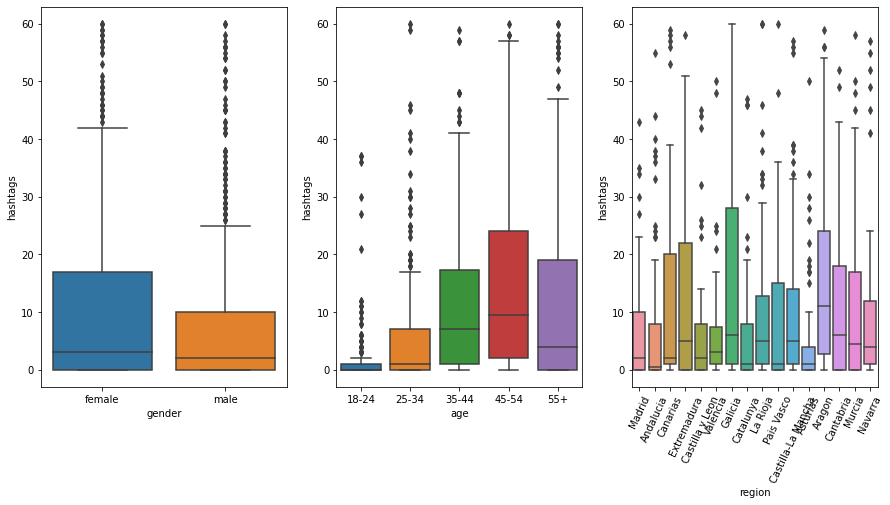

In [13]:
# remove outliers
data = remove_outliers(data,column='hashtags',value=60)
# boxplot
box_plot('hashtags',data)
# statistics
statistics('hashtags',data)

#### Conclusions
- The variables *gender* and *num of hashtags* have ***LOW DEPENDANCY***: the statistical measure, d of Cohen, is slightly above 0.2, and we observe in the box plots that female users use more hashtags than males.
- The variables *age* and *num of hastags* have ***MODERATE DEPENDANCY***: the f of Cohen normalized is above 0.3, and we can see how the youngest users (18-25) barely use hashtags, in contrast with the older users
- The variables *demography* and *num of hastags* have ***MODERATE DEPENDANCY***: the f of Cohen normalized is slightly below 0.3. We can see that users from regions, such as *Aragon, Cantabria or Extremadura* use more hashtags than others from regions like *Catalunya or Asturias*

### 3. Number of URL

In [14]:
# Mann-Whitney U test
df = data.copy()
res = mann_whitney(df,'url')
print(res)

MannwhitneyuResult(statistic=154194.0, pvalue=0.08978554464729481)


In [15]:
# Kruskal-Wallis test
kruskal_posthoc(df,'url')


AGE: KruskalResult(statistic=303.15159760512626, pvalue=2.2643973727700696e-64)
AGE:               18-24         25-34         35-44         45-54           55+
18-24  1.000000e+00  9.794437e-08  1.589358e-29  7.848683e-44  9.491578e-47
25-34  9.794437e-08  1.000000e+00  5.598810e-09  3.686391e-17  1.583202e-19
35-44  1.589358e-29  5.598810e-09  1.000000e+00  3.608591e-02  4.848711e-03
45-54  7.848683e-44  3.686391e-17  3.608591e-02  1.000000e+00  3.789259e-01
55+    9.491578e-47  1.583202e-19  4.848711e-03  3.789259e-01  1.000000e+00
REGION: KruskalResult(statistic=50.91708182067582, pvalue=8.519528950652036e-06)
REGION:                       Madrid  Andalucia  Extremadura  Canarias  \
Madrid              1.000000   0.528335     1.000000  1.000000   
Andalucia           0.528335   1.000000     0.018132  1.000000   
Extremadura         1.000000   0.018132     1.000000  0.096325   
Canarias            1.000000   1.000000     0.096325  1.000000   
Castilla y Leon     0.006269   1.000000 

/var/folders/_x/cddkf2k97y19q18kzrrrxrzw0000gn/T/ipykernel_60775/2118193651.py:51: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  posthoc.set_axis(['18-24','25-34','35-44','45-54','55+'],axis=0,inplace=True)
/var/folders/_x/cddkf2k97y19q18kzrrrxrzw0000gn/T/ipykernel_60775/2118193651.py:52: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  posthoc.set_axis(['18-24','25-34','35-44','45-54','55+'],axis=1,inplace=True)
/var/folders/_x/cddkf2k97y19q18kzrrrxrzw0000gn/T/ipykernel_60775/2118193651.py:81: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  posthoc.set_axis(['Madrid','Andalucia','Extremadura','Canarias','Castilla y Leon','Valencia','Galicia','Catalunya','La

The d of Cohen for gender is: -0.1439731456652684
The f of Cohen for age is: 14.437288902689541
The f of Cohen normalized for age is: 0.3562159413211043
The f of Cohen for demography is: 4.692723885034731
The f of Cohen normalized for demography is: 0.24843832332536805


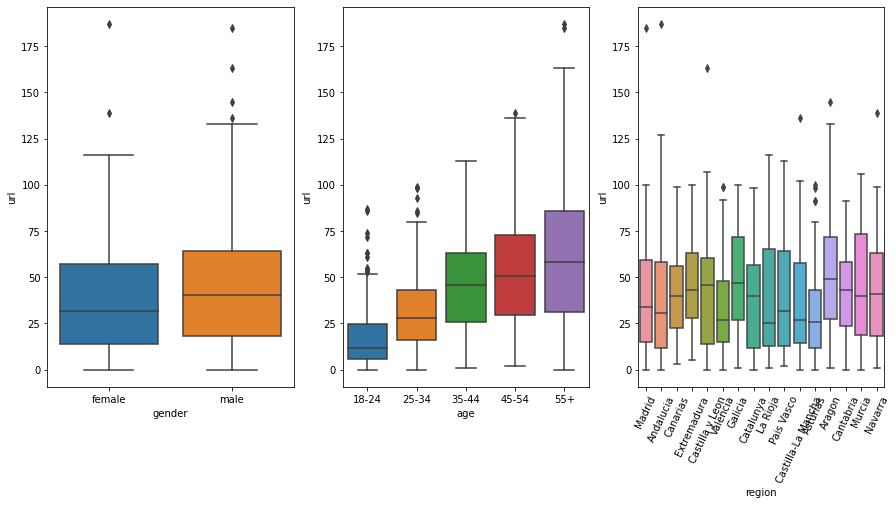

In [14]:
# remove outliers (mentions > 250)
#data = remove_outliers(data, column='url',value=)
# boxplot
box_plot('url',data)
# statistics
statistics('url',data)

#### Conclusions
- The variables *gender* and *num of URL* have ***LOW DEPENDANCY***: the statistical measure, d of Cohen, is close to 0 but above 0.1 and we can observe in the plot that the male users use more URL.
- The variables *age* and *num of URL* have ***MODERATE DEPENDANCY***: the f of Cohen normalized is above 0.3, and we can see how the eldest users (>45 years) use more URL than the youngest users. 
- The variables *demography* and *num of URL* have ***MODERATE DEPENDANCY***: the f of Cohen normalized is above 0.2, but the dependancy is smaller than with the age characteristic. We can see that regions, such as *Cantabria, Aragon or Pais Vasco* have a slightly bigger box than the rest, meaning they use more URL. 

### 4. Number of emojis

In [16]:
# Mann-Whitney U test
df = data.copy()
res = mann_whitney(df,'emojis')
print(res)

MannwhitneyuResult(statistic=211876.5, pvalue=6.859334555438676e-18)


In [17]:
# Kruskal-Wallis test
kruskal_posthoc(df,'emojis')


AGE: KruskalResult(statistic=34.02024965147734, pvalue=7.380968885521579e-07)
AGE:           18-24     25-34     35-44     45-54       55+
18-24  1.000000  0.048536  0.000693  0.029273  0.995499
25-34  0.048536  1.000000  0.646170  0.995499  0.003743
35-44  0.000693  0.646170  1.000000  0.646170  0.000008
45-54  0.029273  0.995499  0.646170  1.000000  0.001371
55+    0.995499  0.003743  0.000008  0.001371  1.000000
REGION: KruskalResult(statistic=31.69251520482368, pvalue=0.007087764701702357)
REGION:                       Madrid  Andalucia  Extremadura  Canarias  \
Madrid              1.000000        1.0     0.364065  1.000000   
Andalucia           1.000000        1.0     1.000000  1.000000   
Extremadura         0.364065        1.0     1.000000  0.181646   
Canarias            1.000000        1.0     0.181646  1.000000   
Castilla y Leon     1.000000        1.0     0.296050  1.000000   
Valencia            1.000000        1.0     1.000000  1.000000   
Galicia             1.000000   

/var/folders/_x/cddkf2k97y19q18kzrrrxrzw0000gn/T/ipykernel_60775/2118193651.py:51: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  posthoc.set_axis(['18-24','25-34','35-44','45-54','55+'],axis=0,inplace=True)
/var/folders/_x/cddkf2k97y19q18kzrrrxrzw0000gn/T/ipykernel_60775/2118193651.py:52: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  posthoc.set_axis(['18-24','25-34','35-44','45-54','55+'],axis=1,inplace=True)
/var/folders/_x/cddkf2k97y19q18kzrrrxrzw0000gn/T/ipykernel_60775/2118193651.py:81: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  posthoc.set_axis(['Madrid','Andalucia','Extremadura','Canarias','Castilla y Leon','Valencia','Galicia','Catalunya','La

The d of Cohen for gender is: 0.3900201399793455
The f of Cohen for age is: 4.770314205879828
The f of Cohen normalized for age is: 0.376953321370423
The f of Cohen for demography is: 5.536297357762428
The f of Cohen normalized for demography is: 0.296106665812253


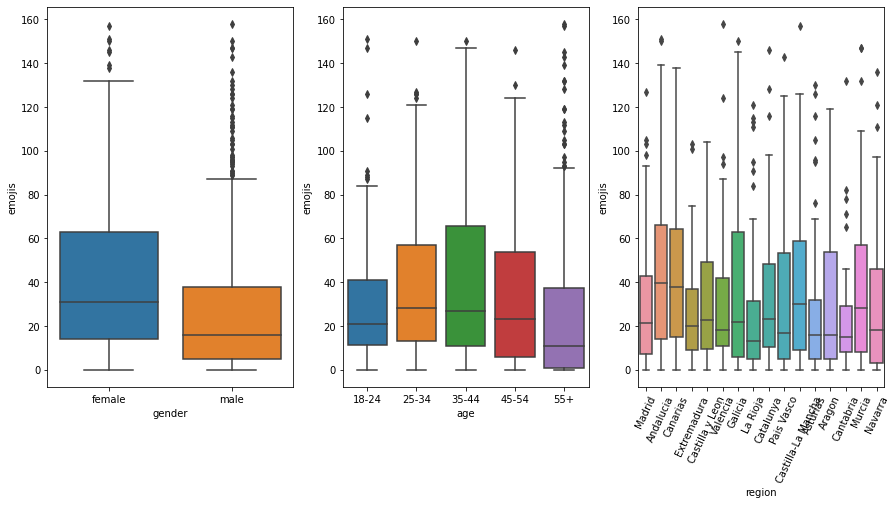

In [15]:
# remove outliers 
data = remove_outliers(data, column='emojis',value=160)
# boxplot
box_plot('emojis',data)
# statistics
statistics('emojis',data)

#### Conclusions
- The variables *gender* and *num of URL* have ***MODERATE DEPENDANCY***: the statistical measure, d of Cohen, has a value around 0.5, therefore we can consider that a moderate relationship between the variables exist. We can also observe in the boxplot that female users tend to use more emojis than males. 
- The variables *age* and *num of URL* have ***MODERATE DEPENDANCY***: the f of Cohen normalized is close to 0.4, and we can see how the eldest users (+55 years) use less emojis than the rest.
- The variables *demography* and *num of URL* have ***MODERATE DEPENDANCY***: the f of Cohen normalized is close to 0.3. We can observe that the users from regions such as *Canarias* use more emojis than the rest (specially ones from *Valencia*)